In [2]:
import numpy as np
import os
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score
import sys

sys.path.append('..')
from grad_utils import grad_logloss_theta_lr
from grad_utils import batch_grad_logloss_lr
from inverse_hvp import inverse_hvp_lr_newtonCG

import argparse
import time
import pdb
import os
np.random.seed(0)

In [3]:
sys.path.insert(0, os.path.dirname(os.getcwd()))

from evaluation.blackbox_util import BlackBoxSimulator
dataset_utilities = BlackBoxSimulator().load_breast_cancer_utilities()
[X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print(f"Prediction model type = {mode}")
print(f"Number of categorical features = {len(categorical_features)}")

from unravel.tabular import UnRAVELTabularExplainer
sample_idx = sample_idx[0]
X_init = np.array([X_test[sample_idx]])
f_e = UnRAVELTabularExplainer(model, X_train, categorical_features = categorical_features, mode = mode)

explanation_IF_FUR = f_e.explain(X_init = X_init, feature_names = features, alpha = "IF_FUR", max_iter = 1, importance_method="ARD")

R2 score for the model on test set = 0.9298245614035088
Prediction model type = classification
Number of categorical features = 0
IF Calculation
R2 score for the model on test set = 0.9298245614035088
x:  [[ 1.18217814e+01  2.64321305e+01  9.87667089e+01 ...  2.63774017e-02
   2.08455306e-01  5.83785289e-02]
 [ 1.10425720e+01  2.91227595e+01  6.88868702e+01 ...  1.60109995e-02
   2.34939752e-01  7.24014737e-02]
 [ 1.40542534e+01  3.21220821e+01  5.33892329e+01 ... -4.09096725e-02
   2.54049884e-01  8.42364403e-02]
 ...
 [ 1.41887435e+01  2.62403047e+01  8.52257400e+01 ...  1.40376219e-03
   1.97240773e-01  5.83898485e-02]
 [ 1.43382160e+01  3.15855146e+01  9.77381831e+01 ...  3.88440291e-02
   2.51838724e-01  6.00950074e-02]
 [ 1.22378322e+01  3.15293903e+01  8.26411366e+01 ...  4.41269870e-02
   2.58408748e-01  6.53583358e-02]]
y_x:  [1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0
 1 

<StemContainer object of 3 artists>

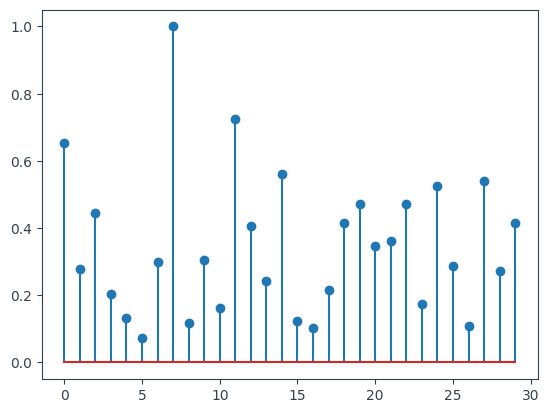

In [3]:
import matplotlib.pyplot as plt
plt.stem(explanation_IF_FUR)

## IF CALCULATION

In [3]:
x = [[1.26017814e+01, 1.50521305e+01, 1.06436709e+02, 8.02364894e+02,
  1.17030554e-01, 1.67745457e-01, 1.26660582e-01, 5.62460698e-02,
  2.12779440e-01, 6.80453438e-02, 1.35163800e-01, 1.36068473e+00,
  1.38554979e+00, 2.79672053e+01, 8.07716376e-03, 2.89990741e-02,
  2.82240606e-02, 1.78527692e-02, 3.58254901e-02, 7.15226273e-03,
  1.36057002e+01, 2.91771700e+01, 7.39967637e+01, 4.87695759e+02,
  1.39815699e-01, 1.05906296e-01, 3.52153888e-01, 1.52177402e-01,
  2.78855306e-01, 7.41185289e-02]]

x = np.array(x)

In [4]:
X_init = [[1.305e+01, 1.859e+01, 8.509e+01, 5.120e+02, 1.082e-01, 1.304e-01, 9.603e-02,
  5.603e-02, 2.035e-01, 6.501e-02, 3.106e-01, 1.510e+00, 2.590e+00, 2.157e+01,
  7.807e-03, 3.932e-02, 5.112e-02, 1.876e-02, 2.860e-02, 5.715e-03, 1.419e+01,
  2.485e+01, 9.422e+01, 5.912e+02, 1.343e-01, 2.658e-01, 2.573e-01, 1.258e-01,
  3.113e-01, 8.317e-02]]

X_init = np.array(X_init)

In [5]:
import numpy as np
import argparse
import time
import pdb
import os
np.random.seed(0)

from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

sys.path.append('..')
from grad_utils import grad_logloss_theta_lr
from grad_utils import batch_grad_logloss_lr
from inverse_hvp import inverse_hvp_lr_newtonCG

print("Computing Jugaadu IF")

from evaluation.blackbox_util import BlackBoxSimulator
dataset_utilities = BlackBoxSimulator().load_breast_cancer_utilities()
[X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()

x_va = X_train[-50:]
y_va = y_train[-50:]
X_train = X_train[:512-50]
y_train = y_train[:512-50]

sigmoid_k = 10
C = 0.1
sample_ratio = 0.6
flip_ratio = 0.4
num_tr_sample = X_train.shape[0]
obj_sample_size = int(sample_ratio * num_tr_sample)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("x_va shape: ", x_va.shape)
print("y_va shape: ", y_va.shape)


clf = LogisticRegression(
        C = C,
        fit_intercept=False,
        tol = 1e-8,
        solver="liblinear",
        multi_class="ovr",
        max_iter=100,
        warm_start=False,
        verbose=0,
        )

clf.fit(X_train,y_train)
y_va_pred = clf.predict_proba(x_va)[:,1]
full_logloss = log_loss(y_va,y_va_pred)
weight_ar = clf.coef_.flatten()
y_te_pred = clf.predict_proba(X_test)[:,1]
full_te_logloss = log_loss(y_test,y_te_pred)
full_te_auc = roc_auc_score(y_test, y_te_pred)
y_te_pred = clf.predict(X_test)
full_te_acc = (y_test == y_te_pred).sum() / y_test.shape[0]

if_start_time = time.time()
test_grad_loss_val = grad_logloss_theta_lr(y_va,y_va_pred,x_va,weight_ar,C,False,0.1/(num_tr_sample*C))
tr_pred = clf.predict_proba(X_train)[:,1]
batch_size = 10000
M = None
total_batch = int(np.ceil(num_tr_sample / float(batch_size)))
for idx in range(total_batch):
    batch_tr_grad = batch_grad_logloss_lr(y_train[idx*batch_size:(idx+1)*batch_size],
        tr_pred[idx*batch_size:(idx+1)*batch_size],
        X_train[idx*batch_size:(idx+1)*batch_size],
        weight_ar,
        C,
        False,
        1.0)

    sum_grad = batch_tr_grad.multiply(X_train[idx*batch_size:(idx+1)*batch_size]).sum(0)
    if M is None:
        M = sum_grad
    else:
        M = M + sum_grad
        
M = M + 0.1/(num_tr_sample*C) * np.ones(X_train.shape[1])
M = np.array(M).flatten()


y_x = clf.predict(x)
y_x0 = clf.predict(X_init)

X_train_orig = np.concatenate((X_train, X_init))
y_train_orig = np.concatenate((y_train, y_x0))
X_train_pert = np.concatenate((X_train, x))
y_train_pert = np.concatenate((y_train, y_x))
tr_pred_orig = np.concatenate((tr_pred, y_x0))
tr_pred_pert = np.concatenate((tr_pred, y_x))


print("X_train_orig shape: ", X_train_orig.shape)
print("y_train_orig shape: ", y_train_orig.shape)
print("X_train_pert shape: ", X_train_pert.shape)
print("y_train_pert shape: ", y_train_pert.shape)
print("tr_pred_orig shape: ", tr_pred_orig.shape)
print("tr_pred_pert shape: ", tr_pred_pert.shape)


iv_hvp_orig = inverse_hvp_lr_newtonCG(X_train_orig,y_train_orig,tr_pred_orig,test_grad_loss_val,C,True,1e-5,True,M,0.1/((num_tr_sample+1)*C))
iv_hvp_perturbed = inverse_hvp_lr_newtonCG(X_train_pert,y_train_pert,tr_pred_pert,test_grad_loss_val,C,True,1e-5,True,M,0.1/((num_tr_sample+1)*C))

# IF = -1 * (iv_hvp_perturbed - iv_hvp_orig)
# IF = (-np.linalg.norm(IF)) 

Computing Jugaadu IF
R2 score for the model on test set = 0.9298245614035088
X_train shape:  (462, 30)
y_train shape:  (462,)
X_test shape:  (57, 30)
y_test shape:  (57,)
x_va shape:  (50, 30)
y_va shape:  (50,)
X_train_orig shape:  (463, 30)
y_train_orig shape:  (463,)
X_train_pert shape:  (463, 30)
y_train_pert shape:  (463,)
tr_pred_orig shape:  (463,)
tr_pred_pert shape:  (463,)
Succeed in getting the inverse of preconditioner M.
iter 0 cg iter 0 iter_diff 869.5501115345966
iter 1 cg iter 0 iter_diff 13.935906432028306
iter 2 cg iter 0 iter_diff 1.3671158605779765
iter 3 cg iter 0 iter_diff 0.3394364461087338
iter 4 cg iter 0 iter_diff 0.15992462923518352
iter 5 cg iter 0 iter_diff 0.05689910803994071
iter 6 cg iter 0 iter_diff 0.004866914500374307
iter 7 cg iter 0 iter_diff 0.00017409401819629857
iter 7 cg iter 10 iter_diff 1.5864103373236646e-05
iter 8 cg iter 0 iter_diff 1.5864103373149548e-05
Optimization terminated successfully.
         Current function value: -0.000030
     

/home/pnans/Documents/GitHub/UnRAvEL/inverse_hvp.py:142: OptimizeWarning: Unknown solver options: preconditioner
  fmin_results = fmin_ncg(f=fmin_loss_fn,
/home/pnans/Documents/GitHub/UnRAvEL/inverse_hvp.py:142: OptimizeWarning: Unknown solver options: preconditioner
  fmin_results = fmin_ncg(f=fmin_loss_fn,


In [6]:
IF = -1 * (iv_hvp_perturbed - iv_hvp_orig)
#IF = (-np.linalg.norm(IF)) 
IF

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.])